<a id = "CHUONG1"> </a>
# CHƯƠNG 1: MỞ ĐẦU <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

1. Mô tả bài toán 

> Người mua hàng tin tưởng vào cơ quan quản lý sản phẩm của Home Depot để tìm và mua những sản phẩm mới nhất và có được những giải pháp kịp thời cho nhu cầu cải tạo nhà cửa của họ. Từ việc lắp quạt trần mới đến tu sửa toàn bộ nhà bếp, chỉ với một cú nhấp chuột hoặc chạm vào màn hình, khách hàng mong đợi kết quả chính xác cho các truy vấn của họ - một cách nhanh chóng. Tốc độ, độ chính xác và mang lại trải nghiệm khách hàng không có ma sát là điều cần thiết. **Trong cuộc thi này, Home Depot đang yêu cầu Kagglers giúp họ cải thiện trải nghiệm mua sắm của khách hàng bằng cách phát triển một mô hình có thể dự đoán chính xác mức độ liên quan của kết quả tìm kiếm**. Mức độ liên quan của tìm kiếm là một thước đo ngầm mà Home Depot sử dụng để đánh giá mức độ nhanh chóng mà họ có thể đưa khách hàng đến với sản phẩm phù hợp. Hiện tại, việc đánh giá là do con người, đây là một quá trình chủ quan và chậm chạp. Bằng cách loại bỏ hoặc giảm thiểu đầu vào của con người trong đánh giá mức độ liên quan của tìm kiếm, Home Depot hy vọng sẽ tăng số lần lặp lại mà nhóm của họ có thể thực hiện trên các thuật toán tìm kiếm hiện tại.

2. Dữ liệu gồm có
* train.csv - tập huấn luyện gồm sản phẩm, tìm kiếm và mức độ liên quan 
* test.csv - tập kiểm tra gồm sản phẩm, tìm kiếm và chúng ta sẽ phải dự đoán mức độ liên quan
* product_descriptions.csv - tập dữ liệu này gồm các đoạn text mô tả chi tiết về sản phẩm 
* attributes.csv - cung câp thông tin mở rộng hơn về sản phẩm, không phải sản phẩm nào cũng có attribute

3. Các bước làm bài toán
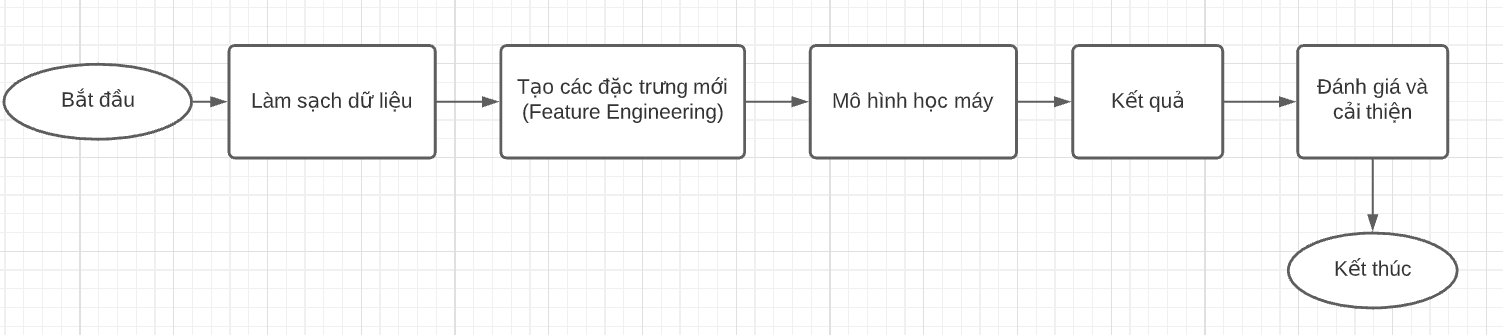

4. Giải nén tập dữ liệu 

In [ ]:
!unzip ../input/home-depot-product-search-relevance/attributes.csv.zip
!unzip ../input/home-depot-product-search-relevance/product_descriptions.csv.zip
!unzip ../input/home-depot-product-search-relevance/test.csv.zip
!unzip ../input/home-depot-product-search-relevance/train.csv.zip

<a id = "workflow"> </a>
# WORK FLOW 

<a href="#CHUONG1"><font size="+3"> CHƯƠNG 1: MỞ ĐẦU </a><br>
<a href="#CHUONG2"><font size="+3"> CHƯƠNG 2: LÀM SẠCH DỮ LIỆU </a><br>
* <a href="#CHUONG2.1"><font size="+2"> 2.1: Khai báo thư viện và đọc dữ liệu </a><br>
* <a href="#CHUONG2.2"><font size="+2"> 2.2: Đánh giá sơ bộ dữ liệu đầu vào </a><br>
    * <a href="#CHUONG2.2.1"><font size="+1"> 2.2.1:  Loại dữ liệu </a><br>
    * <a href="#CHUONG2.2.2"><font size="+1"> 2.2.2: Thống kê cơ bản </a><br>
    * <a href="#CHUONG2.2.3"><font size="+1"> 2.2.3:  Dữ liệu trùng nhau </a><br>
    * <a href="#CHUONG2.2.4"><font size="+1"> 2.2.4: Đồ thi biểu diễn số chữ và số chữ số của cột product_description </a><br>
    * <a href="#CHUONG2.2.5"><font size="+1"> 2.2.5: Đồ thi biểu diễn số chữ và số chữ số của cột product_title  </a><br>
    * <a href="#CHUONG2.2.6"><font size="+1"> 2.2.6: Đồ thị biểu diễn số chữ và số chữ số của cột search_term </a><br>
    * <a href="#CHUONG2.2.7"><font size="+1"> 2.2.7: Đồ thị biểu diễn điểm liên quan (relevance) </a><br>
    * <a href="#CHUONG2.2.8"><font size="+1"> 2.2.8: Số thẻ HTML trong dữ liệu  </a><br>
    * <a href="#CHUONG2.2.9"><font size="+1"> 2.2.9: Đường cong thể hiện phân bố của relevance  </a><br>
* <a href="#CHUONG2.3"><font size="+2"> 2.3: Nối các dữ liệu đang có với nhau</a><br>
* <a href="#CHUONG2.4"><font size="+2"> 2.4: Làm sạch dữ liệu </a><br>
    * <a href="#CHUONG2.4.1"><font size="+1"> 2.4.1: Dùng regex để rút gọn chuỗi </a><br>
    * <a href="#CHUONG2.4.2"><font size="+1"> 2.4.2: Loại bỏ các stopword </a><br>
    * <a href="#CHUONG2.4.3"><font size="+1"> 2.4.3: Loại bỏ các thẻ HTML </a><br>
    
<a href="#CHUONG3"><font size="+3"> CHƯƠNG 3: FEATURE ENGINEERING </a><br>
* <a href="#CHUONG3.1"><font size="+2"> 3.1: Chia đoạn văn thành các từ </a><br>
* <a href="#CHUONG3.2"><font size="+2"> 3.2: Tính edit distance </a><br>
* <a href="#CHUONG3.3"><font size="+2"> 3.3: Tính jaccard simulator</a><br>
* <a href="#CHUONG3.4"><font size="+2"> 3.4: Tính số từ và số chữ </a><br>
* <a href="#CHUONG3.5"><font size="+2"> 3.5: TF-IDF và Cosine similary </a><br>
* <a href="#CHUONG3.6"><font size="+2"> 3.6: CountVectorize và Cosine similary </a><br>
* <a href="#CHUONG3.7"><font size="+2"> 3.7: Tính ratio </a><br>
    * <a href="#CHUONG3.7.1"><font size="+1"> 3.7.1: Tính ratio theo công thức </a><br>
    * <a href="#CHUONG3.7.2"><font size="+1"> 3.7.2: Tính ratio bằng hàm fuzzy </a><br>
* <a href="#CHUONG3.8"><font size="+2"> 3.8:  Tính giá trị Mean</a><br>
* <a href="#CHUONG3.9"><font size="+2"> 3.9: Tính một số feature khác  </a><br>
 
<a href="#CHUONG4"><font size="+3"> CHƯƠNG 4: TẠO MÔ HÌNH HUẤN LUYỆN </a><br>
* <a href="#CHUONG4.1"><font size="+2"> 4.1: Tạo dữ liệu  </a><br>
    * <a href="#CHUONG4.1.1"><font size="+1"> 4.1.1: Loại bỏ dữ liệu dạng chữ </a><br>
    * <a href="#CHUONG4.1.2"><font size="+1"> 4.1.2: Chia data_all thành 2 tập train và test </a><br>
    * <a href="#CHUONG4.1.3"><font size="+1"> 4.1.3: Chia tập dữ liệu thành X_train, y_train, X_test, id_test </a><br>
* <a href="#CHUONG4.2"><font size="+2"> 4.2: Huấn luyện mô hình  </a><br>
    * <a href="#CHUONG4.2.1"><font size="+1"> 4.2.1: Ý tưởng của Boosting  </a><br>
    * <a href="#CHUONG4.2.2"><font size="+1"> 4.2.2: XGBoostRegression </a><br>
* <a href="#CHUONG4.3"><font size="+2"> 4.3: Tính RMSE  </a><br>
* <a href="#CHUONG4.4"><font size="+2"> 4.4: Một số mô hình khác  </a><br>
    * <a href="#CHUONG4.4.1"><font size="+1"> 4.4.1. Chuẩn bị dữ liệu  </a><br>
    * <a href="#CHUONG4.4.2"><font size="+1"> 4.4.2. Mô hình hồi quy tuyến tính  </a><br>
    * <a href="#CHUONG4.4.3"><font size="+1"> 4.4.3. Mô hình Random Forest  </a><br>
    * <a href="#CHUONG4.4.4"><font size="+1"> 4.4.4. Mô hình Gradient Boosting  </a><br>
    * <a href="#CHUONG4.4.1"><font size="+1"> 4.4.1. Mô hình bayes ngây thơ  </a><br>
    
<a href="#CHUONG5"><font size="+3"> CHƯƠNG 5: TỔNG KẾT </a><br>

<a id = "CHUONG2"> </a>
#  CHƯƠNG 2: LÀM SACH DỮ LIỆU (DATA CLEANING)

<a id = "CHUONG2.1"> </a>
## 2.1. Khai báo các thư viện và đọc dữ liệu <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

In [ ]:
!pip install bs4 #cài đặt thư viện beatifullsoup dùng để lại bỏ các tag html

In [ ]:
import pandas as pd 
import re 
import math
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

from bs4 import BeautifulSoup
import lxml
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list
from nltk.metrics import edit_distance
from string import punctuation
from collections import Counter
import numpy as np 

In [ ]:
train_data = pd.read_csv("train.csv", encoding="ISO-8859-1")
test_data = pd.read_csv("test.csv", encoding="ISO-8859-1")
attribute_data = pd.read_csv('attributes.csv')
descriptions = pd.read_csv('product_descriptions.csv')

Bảng dữ liệu train.csv

In [ ]:
train_data.head()

Bảng dữ liệu của test.csv

In [ ]:
test_data.head()

Bảng dữ liệu của product_description.csv gồm các mô tả về sản phẩm 

In [ ]:
descriptions.head()

Bảng dữ liệu của attributes.csv gồm các thuộc tính của sản phẩm 

In [ ]:
attribute_data.head()

Xem kích thước của các tập dữ liệu 

In [ ]:
train_data.shape  # tập train 

Tập dữ liệu train có 74067 hàng và 5 cột ( đặc trưng) 

In [ ]:
test_data.shape # tập test 

Tập dữ liệu test có 166693 hàng và 4 cột (đặc trưng) 

In [ ]:
attribute_data.shape #tập thuộc tính 

Tập dữ liệu gồm các thuộc tính sản phẩm có 2044803 hàng và 3 cột đặc trưng 

In [ ]:
descriptions.shape #tập mô tả 

Tập mô tả về sản phẩm gồm 124428 hàng và 2 cột đặc trưng 

Đánh giá: Với các tập dữ liệu lớn như thế này sẽ mất rất nhiều thời gian xử lý nên em sẽ chia nhỏ ra, lấy 500 mẫu để test trên jupyter sau khi chay thành công trên jupyter thì sẽ chạy với tất cả dữ liệu trên kaggle notebook 

<a id = "CHUONG2.2"> </a>
## 2.2: Đánh giá sơ bộ dữ liệu đầu vào <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

### 2.2.1. Loại dữ liệu có trong các tập dữ liệu <a id = "CHUONG2.2.1"> </a>

**Tập train**

In [ ]:
train_data.dtypes

Đánh giá: 
* id : dữ liệu kiểu int 
* product_uid: dữ liệu kiểu int 
* product_title, search_term: dữ liệu kiểu text 
* relevance: dữ liệu kiểu float 

**Tập test**

In [ ]:
test_data.dtypes

Đánh gía:
* id : dữ liệu kiểu int 
* product_uid: dữ liệu kiểu int 
* product_title, search_term: dữ liệu kiểu text 

**Tập attribute**

In [ ]:
attribute_data.dtypes

Đánh giá:
* product_uid: kiểu dữ liệu int 
* name: kiểu dữ liệu text
* value: kiểu dữ liệu text 

**Tập description**

In [ ]:
descriptions.dtypes

Đánh giá: 
* product_uid: kiểu dữ liệu int 
* product_description: kiểu dữ liệu text 

### 2.2.2. Thống kê cơ bản các dữ liệu đang có <a id = "CHUONG2.2.2"> </a>

**Tập train**

In [ ]:
train_data.describe(include='all')

Các thông số trên cho ta thông tin như sau: 
* max của relevance là 4 và min là 1
* Trung bình relevance là 2.38 => có thể đoán phân bố sẽ có đỉnh lệch về bên phải 

**Tập test**

In [ ]:
test_data.describe(include='all')

Thống kê đặc trưng này không có nhiều ý nghĩa 

### 2.2.3. Kiểm tra xem trong các tập dữ liệu có hàng nào trùng nhau không <a id = "CHUONG2.2.3"> </a>

**Kiểm tra tập train**

In [ ]:
train_data[train_data.duplicated(keep='first')].shape  

Kết luận là Không có hàng nào trùng nhau

**Kiểm tra tập test**

In [ ]:
test_data[test_data.duplicated(keep='first')].shape  

Kết luận là không có hàng nào trùng nhau

**Kiểm tra tập attribute**

In [ ]:
attribute_data[attribute_data.duplicated(keep='first')]
attribute_data = attribute_data.drop_duplicates() #drop các hàng trùng nhau

Kết luận là có 154 hàng trùng nhau nhưng các hàng đó có giá trị là NaN. Giá trị này đã được xử lý bằng hàm drop_duplicate của pandas

**Kiểm tra tập description**

In [ ]:
descriptions[descriptions.duplicated(keep='first')].shape  

Kết luận không có hàng dữ liệu nào trùng nhau 

### 2.2.4. Đồ thi biểu diễn số chữ và số chữ số của cột product_description <a id = "CHUONG2.2.4"> </a>

Ta sẽ dùng đồ thị histogram
* Đồ thị màu xanh thể hiện các số 
* Đồ thị màu cam thể hiện các chữ 

In [ ]:
(descriptions.product_description.str.count('\d+') + 1).hist(bins=30)
(descriptions.product_description.str.count('\W')+1).hist(bins=30)

### 2.2.5. Đồ thi biểu diễn số chữ và số chữ số của cột product_title <a id = "CHUONG2.2.5"> </a>

Ta sẽ dùng đồ thị histogram
* Đồ thị màu xanh thể hiện các số 
* Đồ thị màu cam thể hiện các chữ 

In [ ]:
(train_data.product_title.str.count("\\d+") + 1).hist(bins=30)#plot number of digits in title
(train_data.product_title.str.count("\\w+") + 1).hist(bins=30)#plot word of digits in title

### 2.2.6. Đồ thị biểu diễn số chữ và số chữ số của cột search_term <a id = "CHUONG2.2.6"> </a>

Ta sẽ dùng đồ thị histogram
* Đồ thị màu xanh thể hiện các số 
* Đồ thị màu cam thể hiện các chữ 

In [ ]:
(train_data.search_term.str.count("\\w+") + 1).hist(bins=30) #plot number of words in search therms
(train_data.search_term.str.count("\\d+") + 1).hist(bins=30) #plot number of digits in search terms

### 2.2.7. Đồ thị biểu diễn điểm liên quan (relevance) <a id = "CHUONG2.2.7"> </a>

Gồm các cột thể hiện sự phân bố của các mức điểm từ 1-3. Trong đó tập trung nhiều từ 2-3 

In [ ]:
(train_data.relevance ).hist(bins=30)

### 2.2.8. Đếm số thẻ HTML trong dữ liệu <a id = "CHUONG2.2.8"> </a>

Trong quá trình thu thập dữ liệu từ các trang web thì còn sót lại các tag HTML mà chúng không cần thiết cho quá trình phân tích dữ liệu hay huấn luyện mô hình nên ta cần xem xét và loại bỏ.

In [ ]:
print('total data has html tags in',descriptions.product_description.str.count('<br$').values.sum())

### 2.2.9. Đường cong thể hiện phân bố của relevance <a id = "CHUONG2.2.9"> </a>

sử dụng matplotlib vẽ đường cong để xem phân bố của điểm liên quan, và thấy nó không phải phân bố chuẩn 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm  

train_data.relevance.plot(kind='hist', density=True)

mu, std = norm.fit(train_data.relevance)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

**Nhận xét:**
* điểm liên quan giữa tìm kiếm và sản phẩm phân bố từ 1 - 3 và phần lớn ở 2, 3
* còn 173 tag HTML trong các đoạn text 
* đồ thị diểm liên quan (relevance) không tuân theo phân bố chuẩn
* Ở tập dữ liệu mô tả(description) chứa nhiều số hơn chữ 
* Ở tập dữ liệu huấn luyện, cột product_title chứa nhiều số hơn chữ 

<a id = "CHUONG2.3"> </a>
## 2.3. Nối tập huấn luyện với tập dự đoán, sau đó merge với các tập mô tả <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

Từ tập dữ liệu attribute ta tách được ra cột brand 

In [ ]:
df_brand = attribute_data[attribute_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})

Dữ liệu brand sau khi tách từ attribute 

In [ ]:
# Display the new brand dataframe for examination
df_brand.head()

Tạo cột dữ liệu attribute 

In [ ]:
df_attr_stripped = attribute_data
df_attr_stripped['name'] = df_attr_stripped['name'].astype(str)
df_attr_stripped['name'] = df_attr_stripped['name'].apply(lambda s: re.sub(r"Bullet([0-9]+)", "", s))
df_attr_stripped['attribute'] = df_attr_stripped['name'] + " " + df_attr_stripped['value']
df_attr_test = df_attr_stripped.groupby('product_uid').agg({'attribute': lambda s : ' '.join(s.astype(str))}).reset_index()
# df_attr_test.head()

Dữ liệu attribute sau khi tách 

In [ ]:
df_attr_test

Nối tập train với test 

In [ ]:
data_all = pd.concat([train_data, test_data], axis=0, ignore_index=True) 

Thêm các dữ liệu nhỏ như là description, attribute, brand vào data_all

In [ ]:
data_all = pd.merge(data_all, descriptions, how = 'left', on = 'product_uid')

In [ ]:
data_all = pd.merge(data_all, df_brand, how = 'left', on = 'product_uid')

In [ ]:
data_all = pd.merge(data_all, df_attr_test, how = 'left', on = 'product_uid')

Dữ liệu sau khi gộp sẽ như sau: 

In [ ]:
data_all.shape #kich thuoc 

In [ ]:
data_all.head()

<a id = "CHUONG2.4"> </a>
## 2.4. Làm sạch dữ liệu <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

### 2.4.1. Dùng regex để rút gọn chuỗi <a id = "CHUONG2.4.1"> </a>
Ta dùng regex để thực hiện các nhiệm vụ sau: 
* Thay thế các kí tự, chuỗi không cần thiết bằng khoảng trắng
*  Chuyển chữ thành số ví dụ chuyển fivexfive->5x5
* Chuyển chữ hoa thành chữ thường

In [ ]:
def string_edit(s): 
    if isinstance(s, str):
        s = re.sub(r"(\w)\.([A-Z])", r"\1 \2", s) #Split words with a.A
        s = s.lower()
        s = s.replace("  "," ")
        s = s.replace(",","") #could be number / segment later
        s = s.replace("$"," ")
        s = s.replace("?"," ")
        s = s.replace("-"," ")
        s = s.replace("//","/")
        s = s.replace("..",".")
        s = s.replace(" / "," ")
        s = s.replace(" \\ "," ")
        s = s.replace("."," . ")
        s = re.sub(r"(^\.|/)", r"", s)
        s = re.sub(r"(\.|/)$", r"", s)
        s = re.sub(r"([0-9])([a-z])", r"\1 \2", s)
        s = re.sub(r"([a-z])([0-9])", r"\1 \2", s)
        s = s.replace(" x "," xbi ")
        s = re.sub(r"([a-z])( *)\.( *)([a-z])", r"\1 \4", s)
        s = re.sub(r"([a-z])( *)/( *)([a-z])", r"\1 \4", s)
        s = s.replace("*"," xbi ")
        s = s.replace(" by "," xbi ")
        s = re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s)
        
        # Consolidate variations of equivalent unit terms 
        s = re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s)
        s = re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s)
        s = re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s)
        s = re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s)
        s = re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s)
        s = re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s)
        s = re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s)
        s = s.replace("°"," degrees ")
        s = re.sub(r"([0-9]+)( *)(degrees|degree)\.?", r"\1deg. ", s)
        s = s.replace(" v "," volts ")
        s = re.sub(r"([0-9]+)( *)(volts|volt)\.?", r"\1volt. ", s)
        s = re.sub(r"([0-9]+)( *)(watts|watt)\.?", r"\1watt. ", s)
        s = re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1amp. ", s)
        s = s.replace("  "," ")
        s = s.replace(" . "," ")
        
        # Handling numeric instances with common identifiers
        s = re.sub(r"zero\.?", r"0 ", s)
        s = re.sub(r"one\.?", r"1 ", s)
        s = re.sub(r"two\.?", r"2 ", s)
        s = re.sub(r"three\.?", r"3 ", s)
        s = re.sub(r"four\.?", r"4 ", s)
        s = re.sub(r"five\.?", r"5 ", s)
        s = re.sub(r"six\.?", r"6 ", s)
        s = re.sub(r"seven\.?", r"7 ", s)
        s = re.sub(r"eight\.?", r"8 ", s)
        s = re.sub(r"nine\.?", r"9 ", s)
        
        return s
    else:
        # Return a "null" string if the parameter supplied is not a string
        return "null"

Áp dụng hàm string_edit vào data_all

In [ ]:
data_all['search_term'] = data_all['search_term'].map(lambda x:string_edit(str(x)))
data_all['product_title'] = data_all['product_title'].map(lambda x:string_edit(str(x)))
data_all['product_description'] = data_all['product_description'].map(lambda x:string_edit(str(x)))

In [ ]:
data_all['attribute'] = data_all['attribute'].map(lambda x:string_edit(str(x)))
data_all['brand'] = data_all['brand'].map(lambda x:string_edit(str(x)))

Sau các bước xử lý trên ta đã chuyển được dữ liệu dạng text chữ thường thành chữ hoa, loại bỏ các khoảng trắng, xóa bỏ các ký tự không cần thiết.

In [ ]:
data_all.head()

### 2.4.2. Loại bỏ các stopword <a id = "CHUONG2.4.2"> </a>
* Trong xử lý ngôn ngữ tự nhiên "stopword" là các từ được lọc ra trước hoặc sau quá trình xử lý văn bản. Ví dụ như các từ the, at, which, on, ...
* Ta sẽ sử dụng hàm stopwords trong thư viện nltk để xử lý phần này 

In [ ]:
from bs4 import BeautifulSoup
import lxml
import re
import nltk
from nltk.corpus import stopwords # Import the stop word list
from nltk.metrics import edit_distance
from string import punctuation
from collections import Counter


def remove_html_tag(text):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text().replace('Click here to review our return policy for additional information regarding returns', '')
    return text

def str_stemmer(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

def str_stemmer_title(s):
#     return " ".join([stemmer.stem(word) for word in s.lower().split()])
    return " ".join(map(stemmer.stem, s.lower().split()))

def str_common_word(str1, str2):
    whole_set = set(str1.split())
#     return sum(int(str2.find(word)>=0) for word in whole_set)
    return sum(int(str2.find(word)>=0) for word in whole_set)


def get_shared_words(row_data):
    return np.sum([str_common_word(*row_data[:-1]), str_common_word(*row_data[1:])])

Dùng hàm str_stemmer để loại bỏ stopword 

In [ ]:
data_all['search_term'] = pd.Series(data_all['search_term'].map(lambda x:str_stemmer(str(x))))
data_all['product_title'] = pd.Series(data_all['product_title'].map(lambda x:str_stemmer(str(x))))
data_all['product_description'] = pd.Series(data_all['product_description'].map(lambda x:str_stemmer(str(x))))
data_all['attribute'] = pd.Series(data_all['attribute'].map(lambda x:str_stemmer(str(x))))

Sau bước trên ta đã loại bỏ được các stopword: at, which, on,...

In [ ]:
data_all.head()

### 2.4.3. Loại bỏ các thẻ HTML <a id = "CHUONG2.4.3"> </a>

Ta sẽ sử dụng thư viện beautiful soup 4 để loại bỏ các thẻ HTML trong các đoạn văn. Áp dụng hàm remove_html_tag đã viết ở trên vào 3 cột dữ liệu dạng văn bản product_title, search_term, product_description

In [ ]:
data_all['search_term'] = pd.Series(data_all['search_term'].map(lambda x:remove_html_tag(str(x))))
data_all['product_title'] = pd.Series(data_all['product_title'].map(lambda x:remove_html_tag(str(x))))
data_all['product_description'] = pd.Series(data_all['product_description'].map(lambda x:remove_html_tag(str(x))))

Loại bỏ các thẻ HTML không cần thiết trong dữ liệu

In [ ]:
data_all.head()

<a id = "CHUONG3"> </a>
# CHƯƠNG 3: FEATURE ENGINEERING <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

<a id = "CHUONG3.1"> </a>
## 3.1. Tạo các token của dữ liệu dạng văn bản

Tách các đoạn văn thành các từ

In [ ]:
data_all['search_term_tokens'] = data_all.search_term.str.lower().str.split()
data_all['product_title_tokens'] = data_all.product_title.str.lower().str.split()
data_all['product_description_tokens'] = data_all.product_description.str.lower().str.split()

Ta thu được 3 đặc trưng mới search_term_tokens, product_title_tokens, product_description_tokens

In [ ]:
data_all.head()

<a id = "CHUONG3.2"> </a>
## 3.2. Tính edit_distance <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>
edit_distance là số bước cần thực hiện để chuyển từ chuỗi s1 -> s2.  Ví dụ để chuyển rain -> shine cần 3 bước:"rain” -> “sain” -> “shin” -> “shine” => edit_distance = 3. Ta sẽ dùng hàm edit_distance của thư viện nltk để tính ra đặc trưng edit_distance giữa 2 cặp 

In [ ]:
data_all["edistance_sprot"] = [edit_distance(word1, word2) for word1, word2 in
                                    data_all[["search_term","product_title"]].values.tolist()]
data_all["edistance_sd"] = [edit_distance(word1, word2) for word1, word2 in
                                    data_all[["search_term","product_description"]].values.tolist()]

Sau bước trên ta thu được 2 đặc trưng mới:
* edistance_sprot là khoảng cách edit_distance giữa search_term và product_title
* edistance_sd là khoảng cách edit_distance giữa search_term và product_description

In [ ]:
data_all.head()

<a id = "CHUONG3.3"> </a>
## 3.3. Tính jaccard simulator <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>
jaccard simulator dùng để tính độ tương đồng giữa 2 đoạn văn. Được tính bằng công thức $\frac{\left | a \cap b\right |}{ \left | a \right | + \left | b \right | - \left | a \cap b\right |}$

In [ ]:
def get_jaccard_sim(columns): 
    str1, str2 = columns[0], columns[1]
    a = set(str1) 
    b = set(str2)
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

Dùng hàm get_jaccard_sim để sinh ra 2 đặc trưng mới là jaccard simulator giữa (search_term, product_title) và (search_term và product_description)

In [ ]:
data_all['j_dis_sqt'] = [get_jaccard_sim(rows) for rows in data_all[["search_term_tokens","product_title_tokens"]].values]
data_all['j_dis_sqd'] = [get_jaccard_sim(rows) for rows in data_all[["search_term_tokens","product_description_tokens"]].values]

Thu được 2 đặc trưng mới:
* j_dis_sqt là jaccard simulator giữa search_term_tokens và product_title_tokens
* j_dis_sqd là jaccard simulator giữa search_term_tokens và product_description_tokens

In [ ]:
data_all.head()

<a id = "CHUONG3.4"> </a>
## 3.4. Tính số từ và số chữ trong description_product, search_term, product_title, attribute <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

In [ ]:
data_all['search_query_length'] = data_all.search_term.str.len()
data_all['number_of_words_in_descr'] = data_all.product_description.str.count("\\w+")

In [ ]:
data_all['number_of_words_in_search'] = data_all['search_term_tokens'].map(lambda x: len(x))
data_all['number_of_words_in_title'] = data_all['product_title_tokens'].map(lambda x: len(x))
data_all['length_product_description'] = data_all.product_description.str.len()
data_all['length_product_title'] = data_all.product_title.str.len()
data_all['length_attribute'] = data_all.attribute.str.len()

In [ ]:
# New Feature: Length of attribute string for each product instance
data_all['len_of_attribute'] = data_all['attribute'].map(lambda x:len(str(x).split())).astype(np.int64)
data_all['len_of_brand'] = data_all['brand'].map(lambda x:len(str(x).split())).astype(np.int64)

In [ ]:
data_all.head()

<a id = "CHUONG3.5"> </a>
## 3.5. TF-IDF và CosineSimilary <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

TF-IDF là viết tắt của **Term Frequency-Inverse Document Frequency**. Hiểu mộ cách đơn giản nó là sự kết hợp của tần số xuất hiện của một từ trong một mẫu và nghịch đảo của tần số của từ đó trong toàn bộ tập dữ liệu. Kỹ thuật này được phát triển để đánh giá kết quả cho các truy vấn trong công cụ tìm kiếm và hiện tại nó là một phần không thể thiếu trong xử lý ngôn ngữ tự nhiên. Công thức tính: TF-IDF = TF * IDF. Cụ thể như sau: TF-IDF = TF(w,D) * log($\frac{C}{DF(w)}$). Trong đó: 
* TF(w,D) đại diện cho tần số của từ w xuất hiện trong mẫu D
* Thuật ngữ IDF(w,D) là tần số nghịch đảo của w có thể tính là log của tổng số mẫu dữ liệu xuất hiện từ w


Cosine Similarity (hay độ tương tự của văn bản) là quá trình sử dụng số liệu dựa trên khoảng cách hoặc độ tương tự có thể sử dụng để xác định mức độ tương đương của một văn bản với bất kỳ văn bản nào khác dựa trên các đặc trưng được trích xuất ra từ tf-idf. Về cơ bản, khoảng cách cosin cung cấp cho chúng ta một số liệu biểu thị góc giữa 2 vecto đặc trưng tương ứng của từng mẫu. Khi góc bằng 0 thì cosine = 1 khi đó thì độ tương đồng là lớn nhất. 

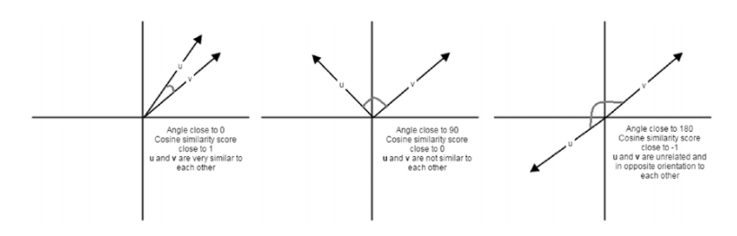


CosineSimulary 2 vector được tính theo công thức sau: sim(x,y) =   $\frac{x * y}{\left \| x \right \| * \left \| y \right \|}$

Ta sử dụng hàm TfidfVectorizer của thư viện sklearn để tạo vector và tính tf-idf cho 2 cặp (search_term, product_title) và (search_term và product_description). Sau đó tính ra 2 đặc trưng mới là cosineSim_title_search và cosineSim_description.

In [ ]:
def cosineSim(v1, v2):
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range (len(v1)):
        x = v1[i]
        y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
        
    return sumxy/math.sqrt(sumxx*sumyy)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
arr1 = []
arr2 = []
arr3 = []
for i in range (len(data_all)):
    product_title_i = data_all['product_title'][i]
    description_i = data_all['product_description'][i]
    attribute_i = data_all['attribute'][i]
    search_term_i = data_all['search_term'][i]
    
    TfidfVectorizer1  = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
    TfidfVectorizer2 = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
    TfidfVectorizer3 = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
    
    tf_idf1 = TfidfVectorizer1.fit_transform([product_title_i, search_term_i])
    tf_idf2 = TfidfVectorizer2.fit_transform([description_i, search_term_i])
    tf_idf3 = TfidfVectorizer3.fit_transform([attribute_i, search_term_i])
    
    # tinh cosine similarrities
    
    cosineSim_title_search = cosineSim(tf_idf1.toarray()[0], tf_idf1.toarray()[1])
    arr1.append(cosineSim_title_search)
    cosineSim_description = cosineSim(tf_idf2.toarray()[0], tf_idf2.toarray()[1])
    arr2.append(cosineSim_description)
    cosineSim_attribute = cosineSim(tf_idf3.toarray()[0], tf_idf3.toarray()[1])
    arr3.append(cosineSim_attribute)

In [ ]:
data_all['tfidf_cosineSim_search_title'] = arr1
data_all['tfidf_cosineSim_search_description'] = arr2
data_all['tfidf_cosineSim_search_attribute'] = arr3

Do khi tính cosine, mẫu = 0 nên một số giá trị sẽ là NaN khiến cho tập dữ liệu không thể đưa vào huấn luyện được. Vì vậy ta sẽ thay các giá trị NaN đó bằng giá trị trung bình các cosine tính được 

In [ ]:
data_all['tfidf_cosineSim_search_title'] = data_all['tfidf_cosineSim_search_title'].fillna(data_all['tfidf_cosineSim_search_title'].sum()/len(data_all))
data_all['tfidf_cosineSim_search_description'] = data_all['tfidf_cosineSim_search_description'].fillna(data_all['tfidf_cosineSim_search_description'].sum()/len(data_all))

Sau các bước trên thu được 3 đặc trưng mới:
* tfidf_cosineSim_search_title là khoảng cách cosine similary giữa 2 vector thu được sau khi thực hiện tf-idf search_term và product_title
* tfidf_cosineSim_search_description là khoảng cách cosine similary giữa 2 vector thu được sau khi thực hiện tf-idf search_term và product_description
* tfidf_cosineSim_search_attribute là khoảng cách cosine similary giữa 2 vector thu được sau khi thực hiện tf-idf search_term và attribute


In [ ]:
data_all.head()

<a id = "CHUONG3.6"> </a>
## 3.6. Countvectorize và cosinesimilary <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

* CountVectorizer được sử dụng để chuyển đổi một bộ sưu tập các tài liệu văn bản thành một vectơ có số lượng thuật ngữ / mã thông báo. Nó cũng cho phép xử lý trước dữ liệu văn bản trước khi tạo biểu diễn vectơ. Chức năng này làm cho nó trở thành một mô-đun biểu diễn tính năng rất linh hoạt cho văn bản.
* Ta sử dụng countvectorize để biến text thành các ma trận thưa rồi dùng cosinesimilary để so sánh chúng

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

arr1 = []
arr2 = []
arr3 = []
for i in range (len(data_all)):
    product_title_i = data_all['product_title'][i]
    description_i = data_all['product_description'][i]
    attribute_i = data_all['attribute'][i]
    search_term_i = data_all['search_term'][i]
    
    vectorizer1 = CountVectorizer()
    vectorizer2 = CountVectorizer()
    vectorizer3 = CountVectorizer()
    
    tf1 = vectorizer1.fit_transform([product_title_i, search_term_i])
    tf2 = vectorizer2.fit_transform([description_i, search_term_i])
    tf3 = vectorizer3.fit_transform([attribute_i, search_term_i])

    
    # tinh cosine similarrities
    
    cosineSim_title_search = cosineSim(tf1.toarray()[0], tf1.toarray()[1])
    arr1.append(cosineSim_title_search)
    cosineSim_description = cosineSim(tf2.toarray()[0], tf2.toarray()[1])
    arr2.append(cosineSim_description)
    cosineSim_attribute = cosineSim(tf3.toarray()[0], tf3.toarray()[1])
    arr3.append(cosineSim_attribute)

In [ ]:
data_all['cosineSim_search_title'] = arr1
data_all['cosineSim_search_description'] = arr2
data_all['cosineSim_search_attribute'] = arr3

Sau khi thực hiện ta thu được các feature thể hiện độ tương quan giữa (search,title), (search, description), (search, attribute).  Dữ  liệu thu được hiển thị như sau:

In [ ]:
data_all.head()

<a id = "CHUONG3.7"> </a>
## 3.7. Tính ratio <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

### 3.7.1. Tính ratio theo công thức <a id = "CHUONG3.7.1"> </a>
* Hàm str_common_word dùng để tìm từ chung giữa 2 đoạn văn. Ta sẽ tìm từ chung của 2 cặp (search_term, product_title) và (search_term, product_description)
* Tính 2 đặc trưng mới theo công thức sau: ratio =  $\frac{số-từ-chung}{num-of-word-in-search}$

In [ ]:
data_all['product_info'] = data_all['search_term']+'\t'+data_all['product_title']+'\t'+data_all['product_description']+'\t'+data_all['attribute']
data_all['word_in_title'] = data_all['product_info'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
data_all['word_in_description'] = data_all['product_info'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[2]))
data_all['word_in_attributes'] = data_all['product_info'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[3]))
data_all['ratio_title'] = data_all['word_in_title']/data_all['number_of_words_in_search']
data_all['ratio_description'] = data_all['word_in_description']/data_all['number_of_words_in_search']
data_all['ratio_attributes'] = data_all['word_in_attributes']/data_all['number_of_words_in_search']
data_all['title_length'] = data_all.product_title.str.len()

In [ ]:
data_all['attr'] = str(data_all['search_term'])+"\t"+str(data_all['brand'])
data_all['brand_in_search'] = data_all['attr'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
data_all['ratio_brand'] = data_all['brand_in_search']/data_all['len_of_brand']

Tương tự như tính cosine thì tính ratio cũng sinh ra một số giá trị NaN nên phải xét giá trị cho những giá trị đó là trung bình.

In [ ]:
data_all['ratio_title'] = data_all['ratio_title'].fillna(data_all['ratio_title'].sum()/len(data_all))
data_all['ratio_description'] = data_all['ratio_description'].fillna(data_all['ratio_description'].sum()/len(data_all))
data_all['ratio_attributes'] = data_all['ratio_attributes'].fillna(data_all['ratio_attributes'].sum()/len(data_all))

Thu được các đặc trưng mới sau:
* word_in_title là số từ chung giữa search_term và product_title 
* word_in_description là số từ chung giữa search_term và product_description
* word_in_attributes là số từ chung giữa search_term và attribute
* ratio_title là tỉ lệ số từ chung giữa search và title chia cho số từ search 
* ratio_description là tỉ lệ số từ chung giữa search và desceiption chia cho số từ search 
* ratio_attributes tỉ lệ số từ chung giữa search và attribute chia cho số từ search 

In [ ]:
data_all.head()

### 3.7.2. Tính ratio bằng hàm fuzzy <a id = "CHUONG3.7.2"> </a>

Fuzzy Seach (tìm kiếm "mờ"), hay còn hay được gọi là Approximate Search (tìm kiếm "xấp xỉ") là khái niệm để chỉ kỹ thuật để tìm kiếm một xâu "gần giống" (thay vì "giống hệt") so với một xâu cho trước. Ví dụ: ta nhập từ tìm kiếm là "le mih hoag" có thể tìm kiếm ra từ "le minh hoang" vì 2 từ gần giống nhau 

In [ ]:
from fuzzywuzzy import fuzz
def fuzzy_partial_ratio(string_1 , string_2):
    return fuzz.partial_ratio(string_1, string_2)

In [ ]:
def fuzzy_token_sort_ratio(string_1,string_2):
    return fuzz.token_sort_ratio(string_1,string_2)

In [ ]:
data_all['fuzzy_ratio_in_title'] = data_all['product_info'].map(lambda x:fuzzy_partial_ratio(x.split('\t')[0],x.split('\t')[1]))
data_all['fuzzy_ratio_in_description'] = data_all['product_info'].map(lambda x:fuzzy_partial_ratio(x.split('\t')[0],x.split('\t')[2]))
data_all['fuzzy_ratio_in_attribute'] = data_all['product_info'].map(lambda x:fuzzy_partial_ratio(x.split('\t')[0],x.split('\t')[3]))

In [ ]:
data_all['fuzzy_token_sort_ratio_in_title'] = data_all['product_info'].map(lambda x:fuzzy_token_sort_ratio(x.split('\t')[0],x.split('\t')[1]))
data_all['fuzzy_token_sort_ratio_in_description'] = data_all['product_info'].map(lambda x:fuzzy_token_sort_ratio(x.split('\t')[0],x.split('\t')[2]))
data_all['fuzzy_token_sort_ratio_in_attribute'] = data_all['product_info'].map(lambda x:fuzzy_token_sort_ratio(x.split('\t')[0],x.split('\t')[3]))

In [ ]:
data_all.head()

<a id = "CHUONG3.8"> </a>
## 3.8. Tính giá trị Mean của product_description, product_title, attribute <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

Sử dụng tf-idf để biến dữ liệu dạng text thành vector sau đó tính giá trị trung bình của các vector đó để chuyển sang dạng số. Giá trị trung bình tính theo công thức sau: mean = $\frac {sum}{len(vector)}$. Ở đây ta dùng hàm np.mean()

In [ ]:
tf = TfidfVectorizer()
arr1 =[]
arr2 = []
arr3 = []
arr4 = []
for i in range (len(data_all)):
    arr1.append(tf.fit_transform([data_all['product_description'][i]]).mean())
#     arr2.append(tf.fit_transform([data_all['search_term'][i]]).mean())
    arr3.append(tf.fit_transform([data_all['product_title'][i]]).mean())
    arr4.append(tf.fit_transform([data_all['attribute'][i]]).mean())
data_all['mean_product_des'] = arr1
# data_all['mean_search_term'] = arr2
data_all['mean_product_title'] = arr3
data_all['mean_attribute'] = arr4

Thu được 3 đặc trưng mới mean_product_des, mean_product_title, mean_attribute:

In [ ]:
data_all.head()

<a id = "CHUONG3.9"> </a>
## 3.9. Tính một số feature khác <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

Kiểm tra xem từ cuối của title và query có giống nhau không, nếu giống thì cho kết quả 1 còn không thì cho kết quả 0.

In [ ]:
# New Feature: The last word which matched between the title and the query
data_all['last_word_title_match'] = data_all['product_info'].map(lambda x:str_common_word(str(x).split('\t')[0].split(" ")[-1],str(x).split('\t')[1]))

Kiểm tra xem từ cuối của description và query có giống nhau không, nếu giống thì cho kết quả 1 còn không thì cho kết quả 0.

In [ ]:
# New Feature: The last word which matched between the description and the query
data_all['last_word_description_match'] = data_all['product_info'].map(lambda x:str_common_word(str(x).split('\t')[0].split(" ")[-1],str(x).split('\t')[2]))

Kiểm tra xem từ đầu của title và query có giống nhau không, nếu giống thì cho kết quả 1 còn không thì cho kết quả 0.

In [ ]:
# New Feature: The first word which matched between the title and the query
data_all['first_word_title_match'] = data_all['product_info'].map(lambda x:str_common_word(str(x).split('\t')[0].split(" ")[0],str(x).split('\t')[1]))

Kiểm tra xem từ đầu tiên của description và query có giống nhau không, nếu giống thì cho kết quả 1 còn không thì cho kết quả 0.

In [ ]:
# New Feature: The first word which matched between the description and the query
data_all['first_word_description_match'] = data_all['product_info'].map(lambda x:str_common_word(str(x).split('\t')[0].split(" ")[0],x.split('\t')[2]))

In [ ]:
data_all.head()

In [ ]:
data_all_test = data_all

Xét độ tương quan giữa các feature và relevance 

In [ ]:
data_all.corrwith(data_all['relevance'])

Nhận xét: fuzzy_ratio_in_title có điểm tương quan cao nhất là 0.29, tức là feature này có hiệu quả cao trong việc dự đoán kết quả, sau đó là các feature có độ tương quan cao là cosineSim_search_title, tfidf_cosineSim_search_title 

<a id = "CHUONG4"> </a>
# CHƯƠNG 4: TẠO MÔ HÌNH HUẤN LUYỆN <a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

<a id = "CHUONG4.1"> </a>
## 4.1. Tạo dữ liệu

### 4.1.1. Loại bỏ các dữ liệu dạng chữ, chỉ lấy dữ liệu dạng số để huấn luyện <a id = "CHUONG4.1.1"> </a>

In [ ]:
data_all = data_all.drop(['product_title', 'search_term', 'product_description', 'search_term_tokens', 'product_title_tokens', 'product_description_tokens', 'product_info', 'attr', 'attribute', 'brand'], axis = 1)

In [ ]:
data_all.head()

### 4.1.2. Chia data_all thành 2 tập train và test <a id = "CHUONG4.1.2"> </a>

In [ ]:
train = data_all[:74067]
test = data_all[74067:]

### 4.1.3. Chia tập dữ liệu thành X_train, y_train, X_test, id_test <a id = "CHUONG4.1.3"> </a>

In [ ]:
y_train = train['relevance'].values
X_train = train.drop(['id', 'relevance'], axis = 1).values 

In [ ]:
id_test = test['id']
X_test = test.drop(['id', 'relevance'], axis = 1).values

## 4.2. Huấn luyện mô hình <a id = "CHUONG4.2"> </a><a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

Sử dụng mô hình XGBRegression (eXtreme Gradient Boosting) 
## 4.2.1. Ý tưởng của Boosting  <a id = "CHUONG4.2.1"> </a>
Xây dựng một lượng lớn các model (thường là cùng loại). Mỗi model sau sẽ học cách sửa lỗi của model trước để cải thiện chất lượng của mô hình (cụ thể ta sẽ giảm trọng số khi dữ liệu đúng và tăng trọng số khi dữ liệu sai) 
## 4.2.2. XGBRegression <a id = "CHUONG4.2.2"> </a>
### 1. Giới thiệu
* Là thuật toán mở rộng của gradient boost 
* Được sử dụng rộng dãi trong các cuộc thi kaggle 
* Ưu điểm:
    + Dễ sử dụng, cài đặt 
    + Cho độ chính xác cao 
    + Các thông số có thể điều chỉnh được 
    + Dữ liệu đầu vào không bị bó buộc, có thể chứa các giá trị như NaN, text,....

### 2. Ý nghĩa toán học
Sử dụng gradient decent để xác định hướng đi đến điểm cực tiểu của hàm mất mát. Cụ thể các công thức toán học trình bày ở các slide trong link sau: 
https://drive.google.com/file/d/1Byr4CEmlCBQOf8lIqUrBI7dYrijUtxmk/view?usp=sharing
### 3. Giải thích các tham số sử dụng trong mô hình 
* max_depth: độ sâu của cây quyết định 
* n_estimators: số lượng cây trong mô hình 
* learning_rate: hệ số học, hệ số này dùng để nhân với kết quả mô hình trước

Ta sử dụng feature_importances của XGBoost và matplotlib để biểu thị độ quan trọng của các feature: 

In [ ]:
import xgboost as xgb
from matplotlib import pyplot
from xgboost import plot_importance
bst = xgb.XGBRegressor(max_depth = 6,
                    n_estimators = 130).fit(X_train , y_train)
y_pred = bst.predict(X_test)
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()
len(bst.feature_importances_)

Thực hiện huấn luyện dữ liệu bằng XGBoost với các tham số giải thích ở bên trên 

In [ ]:
from xgboost import XGBRegressor
import sklearn
xgb = XGBRegressor()
param_grid = {'max_depth':[5, 6], 
              'n_estimators': [130, 150, 170], 
              'learning_rate' : [0.1]}
model_xgb = sklearn.model_selection.GridSearchCV(estimator = xgb, param_grid = param_grid, n_jobs = -1)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

Một số giá trị dự đoán vượt quá 3 sẽ được xét lại là 3

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i] > 3:
        y_pred[i] = 3

Xuất các giá trị dự đoán tập test thành file submission.csv

In [ ]:
pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

## 4.3. Tính RMSE (Root Mean Square Error)<a id = "CHUONG4.3"> </a><a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

Lỗi trung bình bình phương gốc (RMSE) là thước đo mức độ hiệu quả của mô hình của bạn. Nó thực hiện điều này bằng cách đo sự khác biệt giữa các giá trị dự đoán và giá trị thực tế . R-MSE càng nhỏ tức là sai số càng bé thì mức độ ước lượng cho thấy độ tin cậy của mô hình có thể đạt cao nhất. RMSE được tính theo công thức: 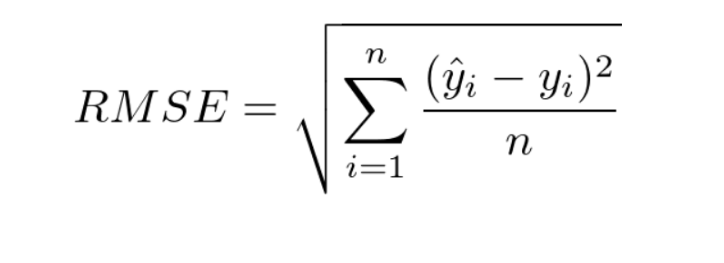

In [ ]:
def caculator_RMSE(X_train, y_train, model):
    return np.sqrt(((y_train - model.predict(X_train)) ** 2).mean())

In [ ]:
print ('RMSE using XGBRegression : ' , caculator_RMSE(X_train, y_train, model_xgb))

## 4.4. Thử với một số mô hình khác <a id = "CHUONG4.4"> </a><a href="#workflow"><font size="+1"> <trở lại work flow> </a><br>

### 4.4.1. Chuẩn bị dữ liệu để huấn luyện mô hình khác  <a id = "CHUONG4.4.1"> </a>

* Lý do phải chuẩn bị lại dữ liệu vì trong dữ liệu sử dụng cho XGBoost có một số giá trị NaN, ưu điểm của XGBoost là có thể sử dụng cả các giá trị đó để huấn luyện nhưng các mô hình khác thì phải xử lý qua để loại bỏ các giá trị NaN.
* Ta sử dụng DataFrame data_all_test sao chép từ data_all
* Dùng dataframe.fillna(values)để ép các dữ liệu NaN về một giá trị mà mình mong muốn

In [ ]:
data_all_test.shape # kích thước của data 
data_all_test =data_all_test.fillna(0) # NaN->0

Tương tự phần trước chia ra các tập train, test. Ở đây em đặt là test1, test2 

In [ ]:
test1 = data_all_test[:74067] #train
test2 = data_all_test[74067:] #test

Kiểm tra lại xem tập test còn giá trị NaN nào không bằng dataframe.isnull().sum()

In [ ]:
test2.isnull().sum()

Kết quả là dữ liệu đã hết các giá trị NaN 

Sau đó drop các cột feature không cần thiết để đưa vào train một số mô hình (bước này giống với chương trước). Sau cell này ta thu được X_train

In [ ]:
X = test1.drop(['id','relevance','product_title', 'search_term', 'product_description', 'search_term_tokens', 'product_title_tokens', 'product_description_tokens', 'product_info', 'attr', 'attribute', 'brand'], axis = 1)


Lấy y_train 

In [ ]:
y = test1['relevance']

Tương tự chương trước ta lấy X_test, y_test

In [ ]:
id_test = test2['id']
X_test = test2.drop(['id','relevance','product_title', 'search_term', 'product_description', 'search_term_tokens', 'product_title_tokens', 'product_description_tokens', 'product_info', 'attr', 'attribute', 'brand'], axis = 1)

### 4.4.2. Mô hình hồi quy tuyến tính  <a id = "CHUONG4.4.2"> </a>

Hồi quy tuyến tính là mô hình học có giám sát cơ bản trong machine learning 
Với dữ  liệu đầu vào là $[x1,x2,x3,...]$. $y$ là output. Hàm dự đoán $y = f(x)$ có dạng: 
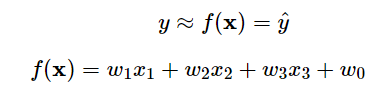

Trong đó:
* $w1,w2,w3$ là các trọng số, $w0$ còn được gọi là bias
* Mối quan hệ $y$ $\approx$  $f(x)$ được gọi là mối quan hệ tuyến tính.

Mục tiêu là đi tìm các trọng số $w1,w2,w3,w0$
* Ảnh minh họa cho hồi quy tuyến tính 
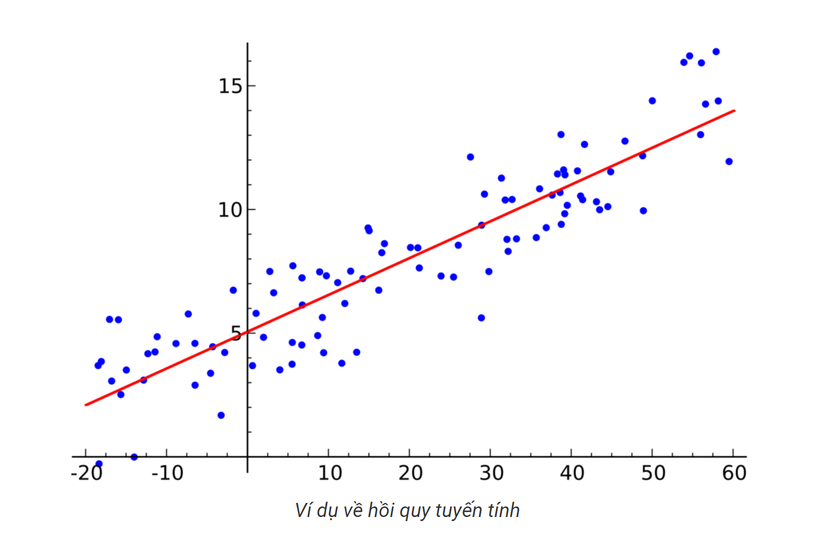

#### Sai số dự đoán 
Chúng ta mong muốn rằng sự sai khác $e$ giữa $y$ và $\hat y$ là nhỏ nhất. Ta có công thức sau:
$\frac{1}{2}e^2$ =  $\frac{1}{2}(y-\hat{y})^2$ = $\frac{1}{2}(y-\bar{x}w)^2$

* Dùng $\frac{1}{2}$ ở đây vì có $e^2$ sau khi đạo hàm sẽ triệt tiêu
* Lý do $e^2$ vì e có thể là một số âm 
* $y-\hat y $ chính là khoảng cách giữa các chấm xanh(nhãn) và đường thẳng đỏ (các điểm dự đoán)

#### Hàm mất mát (Loss function)
Hàm mất mát của mô hình hồi quy tuyến tính sẽ có công thức như sau: 

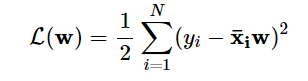

* Mục tiêu của chúng ta là tìm $w$ sao cho hàm mất mát này nhỏ nhất.
* Ta có thể dùng đạo hàm để tìm nghiệm cho bài toán hồi quy tuyến tính. 

Dùng LinearRegresson của thư viện sklearn để tiến hành huấn luyện 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
y_pred = model.predict(X_test)
print("RMSE using LinearRegressor:", caculator_RMSE(X, y, model))

### 4.4.3. Mô hình RandomForestRegressor  <a id = "CHUONG4.4.3"> </a>

Random Forest dịch ra là rừng ngẫu nhiên. Thuật toán sẽ gồm nhiều cây quyết định. Sau đó kết quả sẽ được tổng hợp từ cây quyết định.

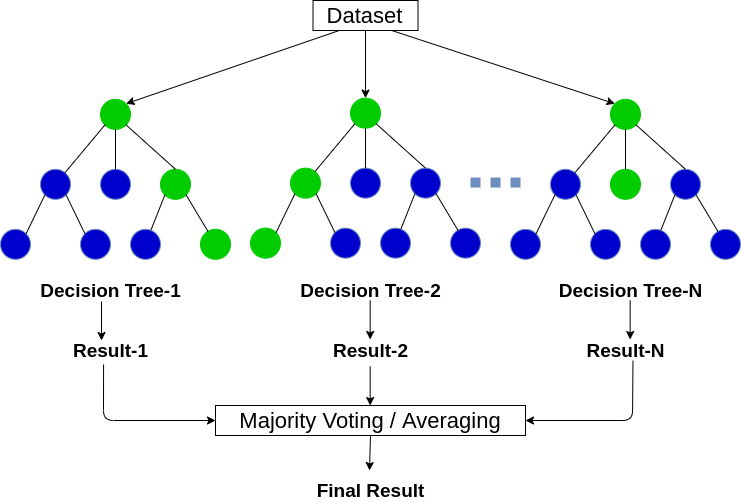!

Để xây dựng cây quyết định ta làm như sau: 
* Lấy ngẫu nhiên n dữ liệu bằng Boostrapping. Tức khi lấy mẫu được một dữ liệu thì không bỏ dữ liệu đó mà vẫn để nó trong tập dữ liệu ban đầu rồi tiếp tục lấy mẫu cho đến khi được n dữ liệu => các dữ liệu lấy được có thể trùng nhau 
* Tiếp theo chọn ngẫu nhiên k thuộc tính ($k<n$). Sau đó xây dựng decision tree với k thuộc tính và n dữ liệu.
* Vote kết quả từ các cây quyết định 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X, y)
y_pred = regressor.predict(X_test)
print("RMSE using RandomForest:", caculator_RMSE(X, y, regressor))

Kết quả cho thấy RMSE rất tốt tức là nó dự đoán trên tập train ra kết quả đúng nhiều nhưng kết quả trên tập validation thì tệ. Lý do vì khi huấn luyện RandomForest phân loại đúng hết các dữ liệu trong tập train nên khả năng trường hợp này bị overfitting 

In [ ]:
# pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission.csv',index=False)

### 4.4.4. Mô hình Gradient Boosting Regressor  <a id = "CHUONG4.4.4"> </a>

* Gradient Boosting là một bản đơn giản của XGBooost
* Ý tưởng của Boosting đã nói ở phần trên là lấy mô hình sau để sửa lỗi mô hình trước đó bằng cách dự đoán lỗi 


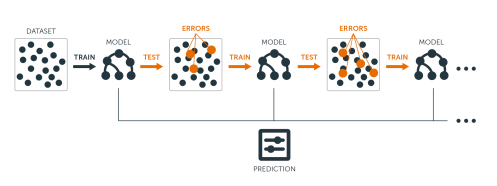

Cụ thể: 
* Cho $Ho = Mo(x) = hằng số $
* $H1=Ho+\alpha1 M1$

ta chọn $\alpha1$ và $M1$ sao cho $\displaystyle \sum_{i=0}^{n} L(H1(xi), yi)$ nhỏ nhất. Trong đó L là hàm lỗi của mô hình
* Tiếp tục như vậy cho đến $Hk = Hk-1 + \alpha k Mk$ 

ta chọn $\alpha k$ và $Mk$ sao cho $\displaystyle \sum_{i=0}^{n} L(Hk(xi), yi)$ nhỏ nhất




#### Đạo hàm hàm lỗi mô hình 

$rik=-\frac{\partial L(\hat yi, yi)}{\partial \hat yi}$
trong đó $\hat yi = Hk-1(xi) $ 

* Tìm $Mk(x)$ sdao cho: 
$Mk(xi) = rik$

Tức là $Mk$ sẽ đi theo chiều rik sao cho L giảm 

Sau đó tìm $\alpha k$ để min $\displaystyle \sum_{i=0}^{n} L(Hk-1(xi) + \alpha k Mk(xi), yi)$

Sử dụng GradientBoostingRegressor của thư viện sklearn để huấn luyện mô hình với n_estimator là số cây = 3, max_depth là độ sâu mỗi cây = 9, max_feature để auto 

In [ ]:
import sklearn
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
                'loss' : ['ls'],
                'n_estimators' : [3], 
                'max_depth' : [9],
                'max_features' : ['auto'] 
             }

gbr = GradientBoostingRegressor()

model_gbr = sklearn.model_selection.GridSearchCV(estimator = gbr, n_jobs = -1, param_grid = param_grid)
model_gbr.fit(X, y)

y_pred = model_gbr.predict(X_test)
print("RMSE using GBR:", caculator_RMSE(X, y, model_gbr))

### 4.4.5. Mô hình Nayve Bayes  <a id = "CHUONG4.4.5"> </a>

In [ ]:
from sklearn.linear_model import BayesianRidge

gnb = BayesianRidge()
param_grid = {}
model_nb = sklearn.model_selection.GridSearchCV(estimator = gnb, param_grid = param_grid, n_jobs = -1)
model_nb.fit(X, y)

y_pred = model_nb.predict(X_test)
print("RMSE using Nayve bayes:", caculator_RMSE(X, y, model))

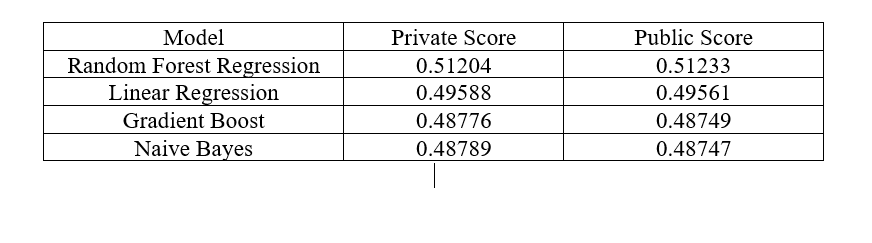

# CHƯƠNG 5: TỔNG KẾT 

Kiến thức học được sau project:

* Tham gia cuộc thi thuộc lĩnh vực học máy
* Cách làm việc trên dữ liệu lớn 
* Các cách đánh giá dữ liệu trước khi xử lý 
* Tiền xử lý dữ liệu 
* Các phương pháp feature engineering để xử lý dữ liệu dạng văn bản có cấu trúc và phi cấu trúc (Counvecterize, tf-idf, word2vec, .....)
* Đánh giá dữ liệu trước khi đưa vào huấn luyện (feature important) 
* Hiểu kĩ hơn về các mô hình học kết hợp (random forest, XGBoost, gradient boost)
* Đánh giá mô hình sau huấn luyện 
